## Лабораторная работа №1 | Вариант 3

Выполнил: Мозговой Никита 309Б


### 1. Numpy

In [5]:
import numpy as np
from numpy import floating
from numpy.ma.core import max_value

ImportError: cannot import name 'max_value' from 'numpy.ma.core' (C:\Users\Asus\miniconda3\Lib\site-packages\numpy\ma\core.py)

1. Создайте массив D размером 4x4, заполненный числами от 1 до 16. Используйте срезы, чтобы извлечь подмассив размером 2x2, начиная с элемента в строке 1 и столбце 1.

In [35]:
D = np.arange(1, 17).reshape(4,4)
subD = D[0:2, 0:2]
print(subD)

[[1 2]
 [5 6]]


2. Создайте трехмерный массив a размером 4x3x2, заполненный случайными числами от 1 до 10. Найдите сумму всех элементов вдоль оси 1.

In [48]:
array = np.random.randint(1, 11, size=(4, 3, 2))

sum_ax1 = np.sum(np.sum(array, axis=1))

print(sum_ax1)

130


3. Напишите функцию, которая принимает матрицу и производит нормировку её элементов (т.е. $A'_{ij} = A_{ij} / \sum_{i} \sum_{j} A_{ij}$)

In [ ]:
def normalize_matrix(matrix: list[list[float]]) -> np.ndarray:
    matrix_array = np.array(matrix)
    total_sum = np.sum(matrix_array)

    if total_sum == 0:
        raise ValueError("Summ equals zero")

    normalized_matrix = matrix_array / total_sum
    
    return normalized_matrix

4. Напишите функцию, которая принимает 3 трехмерных вектора $x, y, z$ и вычисляет объем пирамиды, образованной этими векторами (используйте смешанное произведение векторов)

In [ ]:

def pyramid_volume(x: np.ndarray, y: np.ndarray, z: np.ndarray) -> float:
    cross_product = np.cross(y, z)
    mixed_product = np.dot(x, cross_product)
    volume = abs(mixed_product) / 6
    
    return volume

5. Напишите функцию, которая принимает число N и строит матрицу NxN, с нулями внутри и единицами на границе.

In [49]:
def create_matrix_with_1_on_boards(scale: int) -> np.ndarray:
    result_matrix = np.zeros(shape=(scale, scale))
    
    for i in range (0, scale):
        for j in range (0, scale):
            if (i == 0 and j == 0) or (i == scale - 1 and j == 0):
                result_matrix[i, j] = 1
    
    return result_matrix

6. Создайте матрицу шахматную доску 8х8 используя функцию `tile`

In [51]:
pattern = np.array([[1, 0],
                    [0, 1]])

chessboard = np.tile(pattern, (4, 4))

print(chessboard)

[[1 0 1 0 1 0 1 0]
 [0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0]
 [0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0]
 [0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0]
 [0 1 0 1 0 1 0 1]]


7. Как найти наиболее близкое значение (к заданному скаляру) в векторе?

In [ ]:
def find_nearest_value(vec: np.ndarray, scalar: float) -> float:
    diffs = np.abs(vec - scalar)
    
    nearest_ind = np.argmin(diffs)
    
    return diffs[nearest_ind]

8. Создайте случайный вектор размером 10 и отсортируйте его

In [65]:
vector = np.array(np.random.randint(1, 10, size=10))
vector.sort()

print(vector)

[1 1 2 3 3 4 5 7 8 9]


9. Создайте случайный вектор длиной 10 и замените максимальное значение в нем на 0

In [71]:
vector = np.array(np.random.randint(1, 10, size=10))
index_max = 0
max_value = np.max(vector)

for i in range (0, len(vector)):
    if vector[i] == max_value:
        index_max = i
        break
        
vector[index_max] = 0

print(vector)

[6 1 8 8 5 1 0 9 9 7]


10. Даны 2 массива Х и Y, постройте матрицу Коши $C$ ($C_{ij} = \frac{1}{x_i - y_j}$)

In [ ]:
def cauchy_matrix(X: np.ndarray, Y: np.ndarray) -> np.ndarray:

    matrix_c = 1.0 / (X[:, np.newaxis] - Y[np.newaxis, :])
    
    return matrix_c

### 2. Pandas

Представлено 2 датасета в формате CSV.

Найдите ответы на вопросы или выполните действия с предложенным датасетом

Файлы: `countries.csv`, `covid-country-data.csv`

In [9]:
import pandas as pd

In [ ]:
# Load data here

In [10]:
data = pd.read_csv('countries.csv')

In [4]:
data.head()

,location,continent,population,life_expectancy,hospital_beds_per_thousand,gdp_per_capita
0,Afghanistan,Asia,38928341.0,64.83,0.50,1803.987
1,Albania,Europe,2877800.0,78.57,2.89,11803.431
2,Algeria,Africa,43851043.0,76.88,1.90,13913.839
3,Andorra,Europe,77265.0,83.73,NaN,NaN
4,Angola,Africa,32866268.0,61.15,NaN,5819.495


1. Какое общее население планеты, согласно датасету?

In [81]:
total_population = data['population'].sum()
print(f"peoples: {int(total_population)}")

peoples: 7757980095


2. Выведите страну с наименьшей продолжительностью жизни

In [88]:
country_with_min_life_expectancy = data.loc[data['life_expectancy'].idxmin()]

print(f"Страна с наименьшей продолжительностью жизни: {country_with_min_life_expectancy['location']}")
print(f"Продолжительность жизни: {country_with_min_life_expectancy['life_expectancy']}")

Страна с наименьшей продолжительностью жизни: Central African Republic
Продолжительность жизни: 53.28


3. Выведите страну с наибольшим ВВП на душу населения ('gdp_per_capita')

In [91]:
country_with_most_gpd_per_capita = data.loc[data['gdp_per_capita'].idxmax()]

print(f"Location with the biggest gdp: {country_with_most_gpd_per_capita['location']}")

Location with the biggest gdp: Qatar


4. Заполните пропуски в 'life_expectancy' медианным значением и посчитайте среднюю продолжительность жизни

In [94]:
median_life_expectancy = data['life_expectancy'].median()
data['life_expectancy'] = data['life_expectancy'].fillna(median_life_expectancy)
sum_life_expectancy = data['life_expectancy'].sum()
count_location = data['location'].value_counts()
avg_life_expectancy = sum_life_expectancy / count_location.sum()
print(avg_life_expectancy)

73.55214285714285


5. Выведите топ-15 стран по численности населения

In [95]:
top_countries = data[['location', 'population']].sort_values(by='population', ascending=False)

top_15_countries = top_countries.head(15)

print(top_15_countries)

          location    population
41           China  1.439324e+09
90           India  1.380004e+09
199  United States  3.310026e+08
91       Indonesia  2.735236e+08
145       Pakistan  2.208923e+08
27          Brazil  2.125594e+08
141        Nigeria  2.061396e+08
15      Bangladesh  1.646894e+08
157         Russia  1.459345e+08
125         Mexico  1.289328e+08
99           Japan  1.264765e+08
63        Ethiopia  1.149636e+08
151    Philippines  1.095811e+08
58           Egypt  1.023344e+08
205        Vietnam  9.733858e+07


6. Среди стран, входящих в топ-25 по ВВП на душу населения (gdp_per_capita) выведите 5 стран с наименьшим населением

In [97]:
top_25_gdp_per_capita = (data[['location', 'gdp_per_capita', 'population']]
                         .sort_values(by='gdp_per_capita', ascending=False)
                         .head(25))

top_5_smallest_by_population = (top_25_gdp_per_capita
                                .sort_values(by='population')
                                .head(5))

print(top_5_smallest_by_population)

           location  gdp_per_capita  population
162      San Marino       56861.470     33938.0
21          Bermuda       50669.315     62273.0
37   Cayman Islands       49903.029     65720.0
89          Iceland       46482.958    341250.0
29           Brunei       71809.251    437483.0


7. Соедините таблицы covid-country-data и countries

In [11]:
covid_data = pd.read_csv('covid-country-data.csv')
merged_tables = pd.merge(covid_data, data, on='location')

print(merged_tables)

           location  total_cases  total_deaths  total_tests continent  \
0       Afghanistan      38243.0        1409.0          NaN      Asia   
1           Albania       9728.0         296.0          NaN    Europe   
2           Algeria      45158.0        1525.0          NaN    Africa   
3           Andorra       1199.0          53.0          NaN    Europe   
4            Angola       2729.0         109.0          NaN    Africa   
..              ...          ...           ...          ...       ...   
205         Vietnam       1046.0          35.0     261004.0      Asia   
206  Western Sahara        766.0           1.0          NaN    Africa   
207           Yemen       1976.0         571.0          NaN      Asia   
208          Zambia      12415.0         292.0          NaN    Africa   
209        Zimbabwe       6638.0         206.0      97272.0    Africa   

     population  life_expectancy  hospital_beds_per_thousand  gdp_per_capita  
0    38928341.0            64.83            

8. Добавьте для всех стран добавьте колонку, в которой была бы отражена смертность на 1 млн человек населения (пропуски заполните средним значением)

In [6]:
covid_data = pd.read_csv('covid-country-data.csv')

In [7]:
covid_data.head()

,location,total_cases,total_deaths,total_tests
0,Afghanistan,38243.0,1409.0,NaN
1,Albania,9728.0,296.0,NaN
2,Algeria,45158.0,1525.0,NaN
3,Andorra,1199.0,53.0,NaN
4,Angola,2729.0,109.0,NaN


In [12]:
merged_tables['mortality_per_million'] = (merged_tables['total_deaths'] / merged_tables['population']) * 1_000_000
average_mortality = merged_tables['mortality_per_million'].mean()
merged_tables['mortality_per_million'] = (merged_tables['total_deaths'] / merged_tables['population']) * 1_000_000

print(merged_tables.head())

      location  total_cases  total_deaths  total_tests continent  population  \
0  Afghanistan      38243.0        1409.0          NaN      Asia  38928341.0   
1      Albania       9728.0         296.0          NaN    Europe   2877800.0   
2      Algeria      45158.0        1525.0          NaN    Africa  43851043.0   
3      Andorra       1199.0          53.0          NaN    Europe     77265.0   
4       Angola       2729.0         109.0          NaN    Africa  32866268.0   

   life_expectancy  hospital_beds_per_thousand  gdp_per_capita  \
0            64.83                        0.50        1803.987   
1            78.57                        2.89       11803.431   
2            76.88                        1.90       13913.839   
3            83.73                         NaN             NaN   
4            61.15                         NaN        5819.495   

   mortality_per_million  
0              36.194710  
1             102.856349  
2              34.776824  
3             

### 3. Визуализация

Используя библиотеки matplotlib/sns/plotly/pandas и набор данных представленный ранее визуализируйте

1. Сделайте круговую диаграмму, на которой были бы отражено число заболеваний COVID-19 по континентам

In [14]:
import matplotlib.pyplot as plt

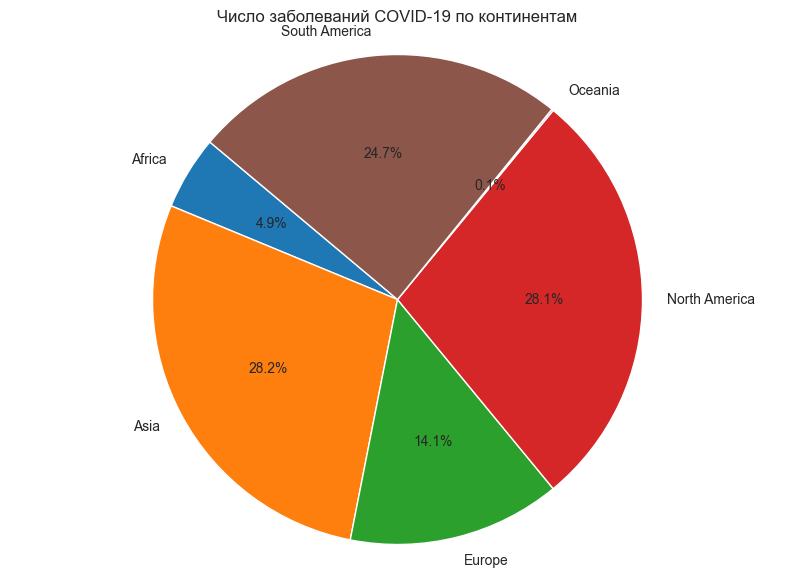

In [15]:
continent_cases = merged_tables.groupby('continent')['total_cases'].sum()

plt.figure(figsize=(10, 7))
plt.pie(continent_cases, labels=continent_cases.index, autopct='%1.1f%%', startangle=140)
plt.title('Число заболеваний COVID-19 по континентам')
plt.axis('equal')
plt.show()

2. Постройте диаграмму, на которой в порядке убывания были бы отмечены число тестов на COVID-19 в России, Китае, США, Индии и Нигерии

YEEES


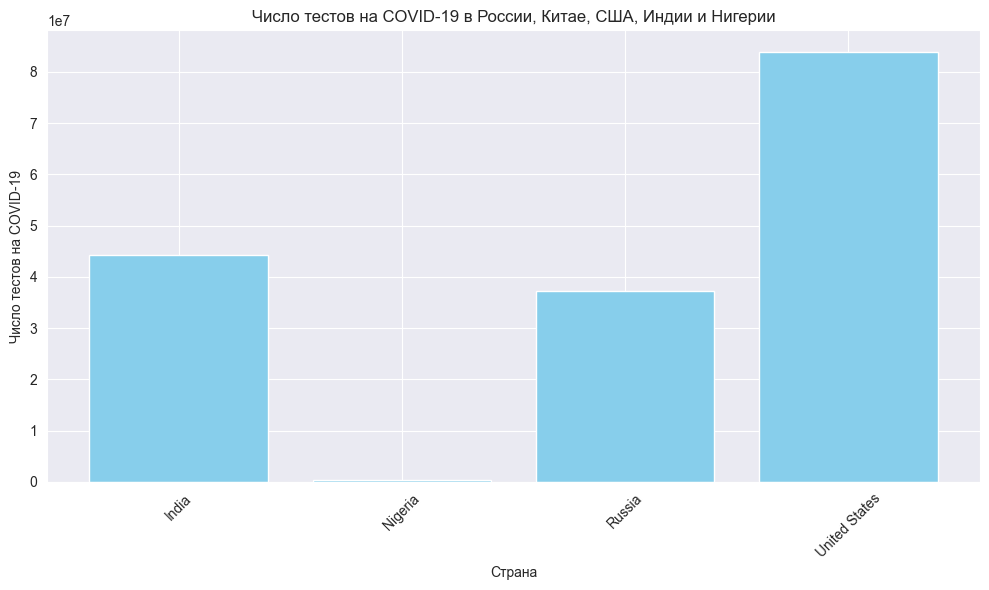

In [16]:
countries = ['Russia', 'China', 'United States', 'India', 'Nigeria']
filtered_data = covid_data[covid_data['location'].isin(countries)]

sorted_data = filtered_data.sort_values(by='total_tests', ascending=False)
if any(covid_data.location == 'China'):
    print("YEEES")
plt.figure(figsize=(10, 6))
plt.bar(filtered_data['location'], filtered_data['total_tests'], color='skyblue')
plt.xlabel('Страна')
plt.ylabel('Число тестов на COVID-19')
plt.title('Число тестов на COVID-19 в России, Китае, США, Индии и Нигерии')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

3. Визуализируйте зависимость ВВП страны и случаев заболевания COVID-19

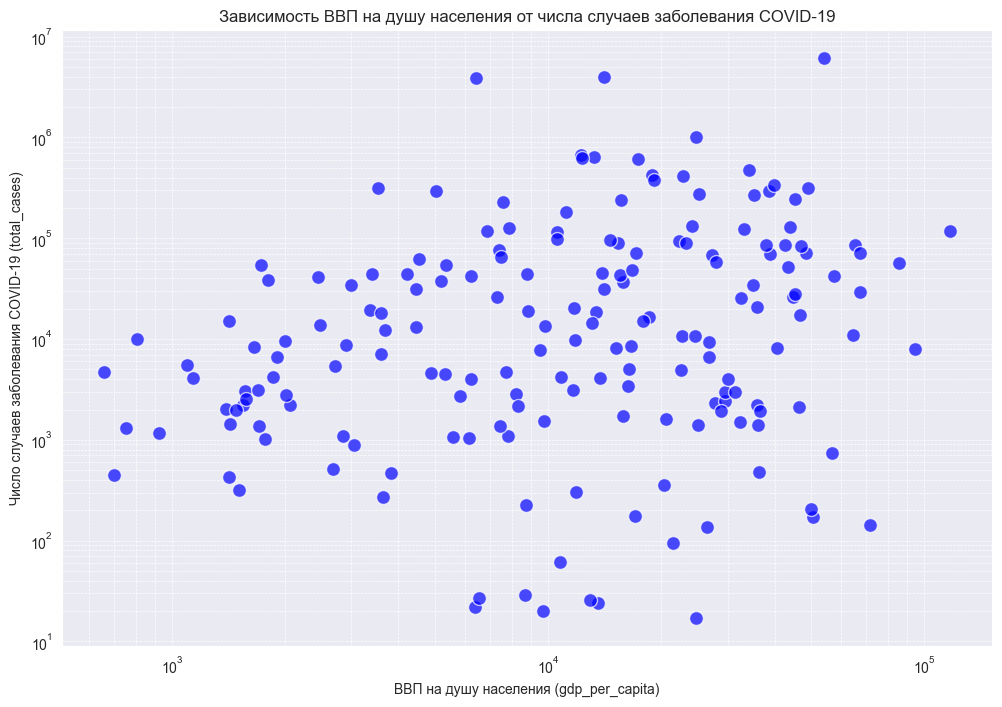

In [17]:
data = merged_tables[['gdp_per_capita', 'total_cases']].dropna()

plt.figure(figsize=(12, 8))
plt.scatter(data['gdp_per_capita'], data['total_cases'], alpha=0.7, c='blue', edgecolors='w', s=100)
plt.xlabel('ВВП на душу населения (gdp_per_capita)')
plt.ylabel('Число случаев заболевания COVID-19 (total_cases)')
plt.title('Зависимость ВВП на душу населения от числа случаев заболевания COVID-19')
plt.xscale('log')  # Использование логарифмической шкалы для ВВП (по желанию)
plt.yscale('log')  # Использование логарифмической шкалы для случаев (по желанию)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

4. Постройте гистограмму распределения количества смертей на один миллион человек

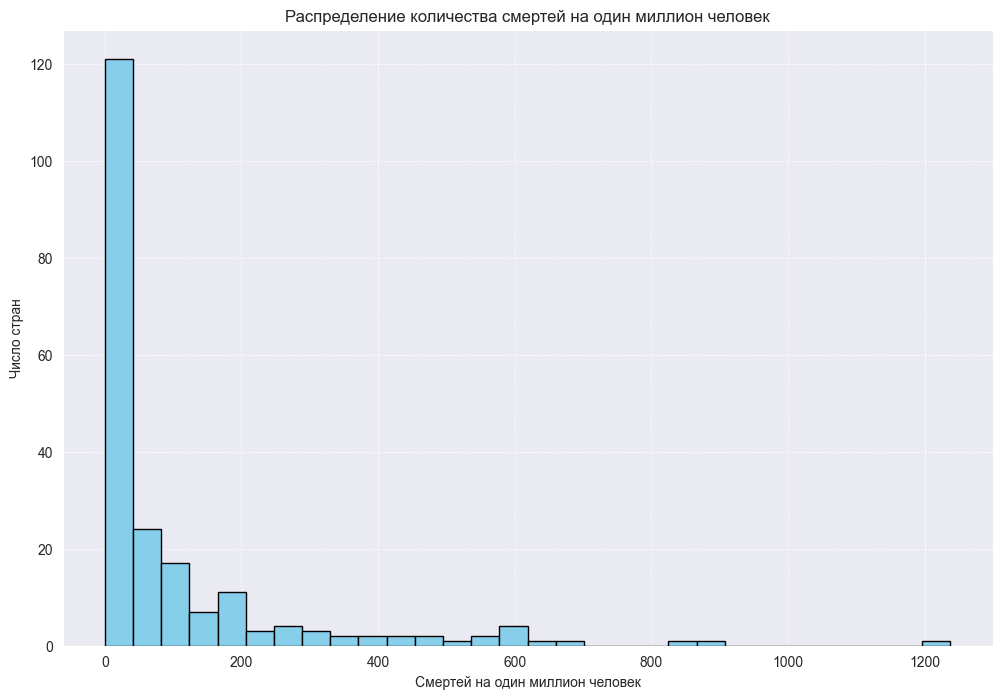

In [19]:
merged_tables['deaths_per_million'] = (merged_tables['total_deaths'] / merged_tables['population']) * 1_000_000

average_deaths_per_million = merged_tables['deaths_per_million'].mean()

merged_tables['deaths_per_million'] = merged_tables['deaths_per_million'].fillna(average_deaths_per_million)

plt.figure(figsize=(12, 8))
plt.hist(merged_tables['deaths_per_million'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Смертей на один миллион человек')
plt.ylabel('Число стран')
plt.title('Распределение количества смертей на один миллион человек')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

5. Постройте диаграмму отображающую среднюю продолжительность жизни в разных странах европы

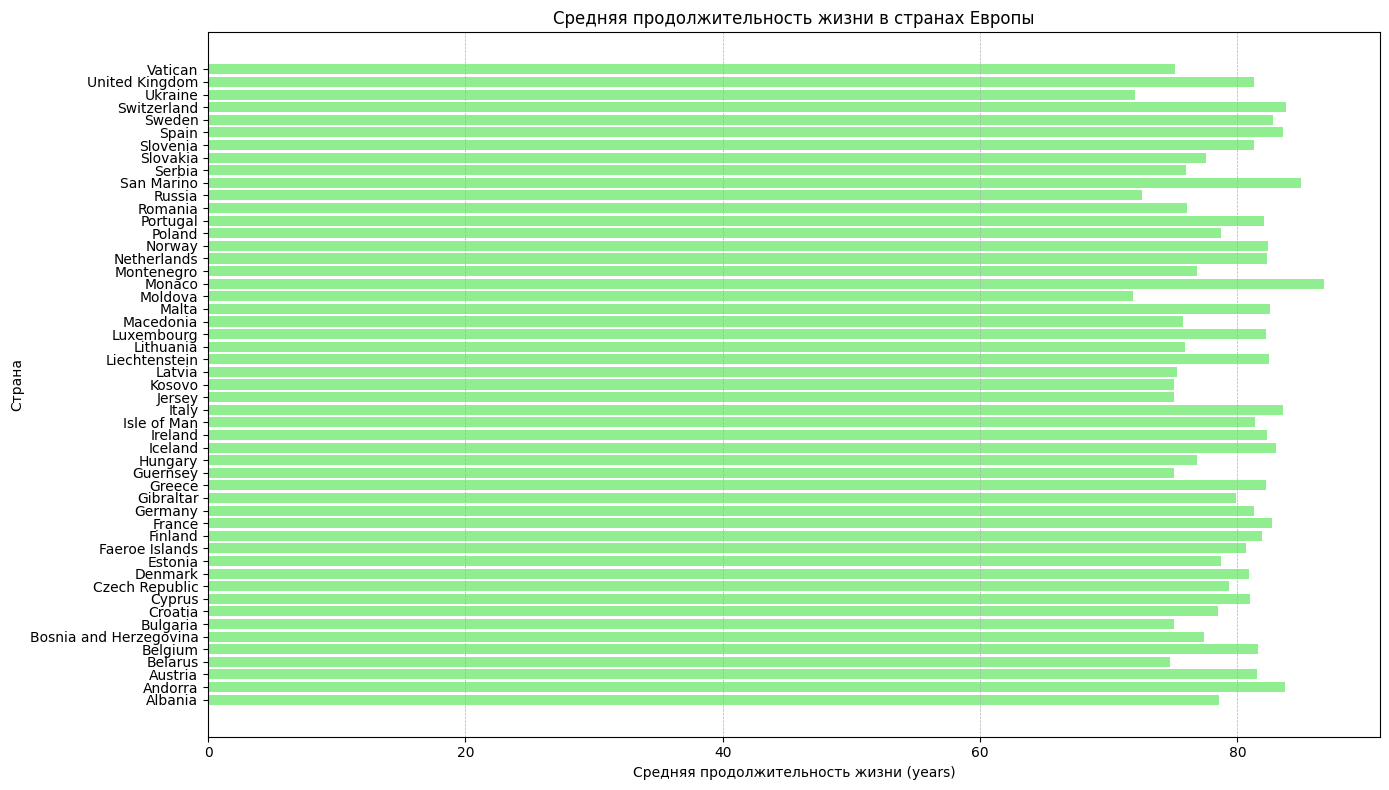

In [128]:
europe_data = merged_tables[merged_tables['continent'] == 'Europe']
plt.figure(figsize=(14, 8))
plt.barh(europe_data['location'], europe_data['life_expectancy'], color='lightgreen')
plt.xlabel('Средняя продолжительность жизни (years)')
plt.ylabel('Страна')
plt.title('Средняя продолжительность жизни в странах Европы')
plt.grid(axis='x', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

6. Сравните распределения кол-ва смертей на 1000 человек в Европе и Африке

In [21]:
import seaborn as sns

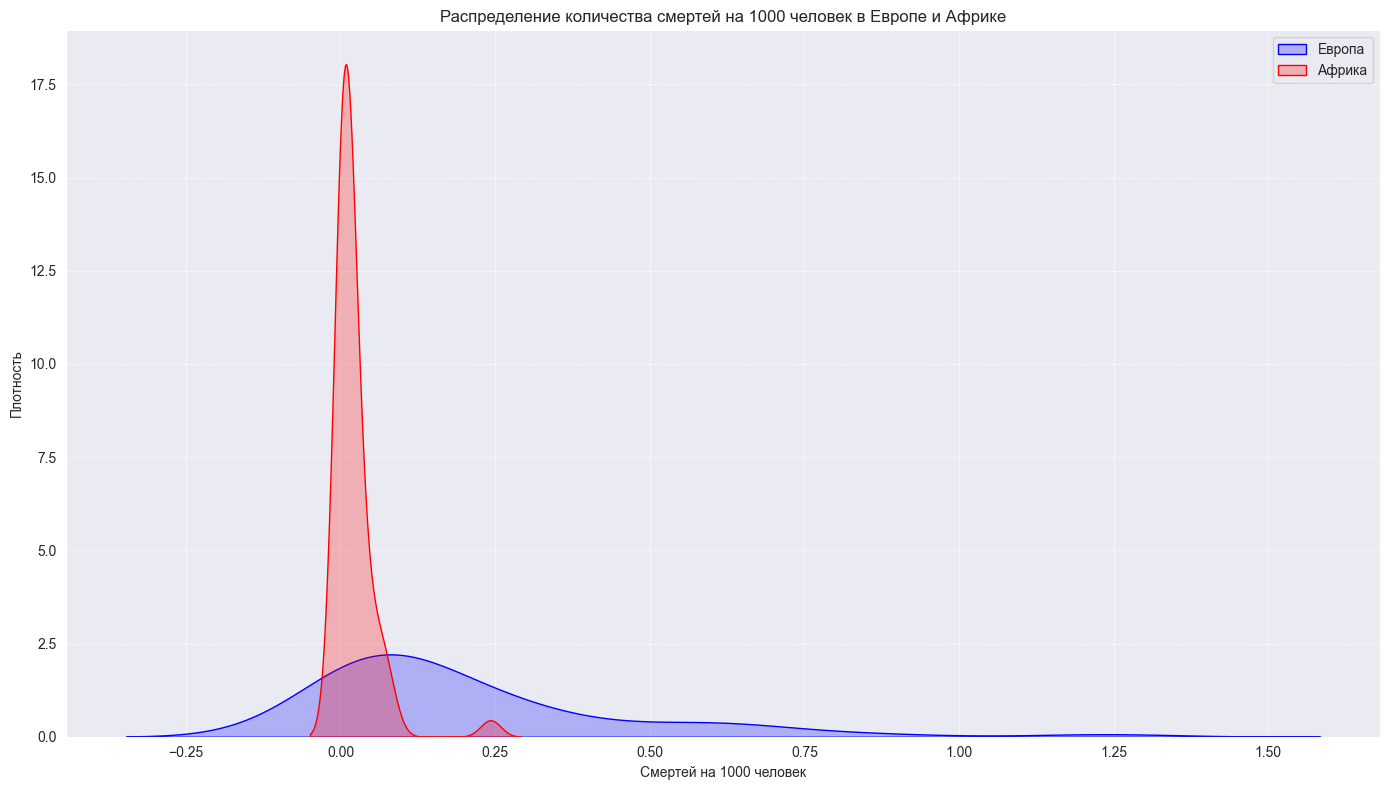

In [22]:
if 'deaths_per_thousand' not in merged_tables.columns:
    merged_tables['deaths_per_thousand'] = (merged_tables['total_deaths'] / merged_tables['population']) * 1_000

europe_data = merged_tables[merged_tables['continent'] == 'Europe']
africa_data = merged_tables[merged_tables['continent'] == 'Africa']

plt.figure(figsize=(14, 8))

sns.kdeplot(europe_data['deaths_per_thousand'].dropna(), fill=True, color='blue', label='Европа')
sns.kdeplot(africa_data['deaths_per_thousand'].dropna(), fill=True, color='red', label='Африка')

plt.xlabel('Смертей на 1000 человек')
plt.ylabel('Плотность')
plt.title('Распределение количества смертей на 1000 человек в Европе и Африке')
plt.legend(loc='upper right')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

In [13]:
a = np.array([[1, 1, 1, 1],
[1, 0, 0, 1],
[1, 0, 0, 1],
[1, 1, 1, 1]])
a

array([[1, 1, 1, 1],
       [1, 0, 0, 1],
       [1, 0, 0, 1],
       [1, 1, 1, 1]])